In [ ]:
### IIT MADRAS: DATA SCIENCE PROJECT REPORT
### Loan Approval Prediction System
### TULIKA DEB 
### PRESIDIUM SCHOOL, INDIRAPURAM 
### Date of submission: 02 | 03 | 2025

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df=pd.read_csv("new_loan_data.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,LP002894,Female,Yes,0,Graduate,No,3166,0.0,36.0,360.0,1.0,Semiurban,Y
296,LP002911,Male,Yes,1,Graduate,No,2787,1917.0,146.0,360.0,0.0,Rural,N
297,LP002916,Male,Yes,0,Graduate,No,2297,1522.0,104.0,360.0,1.0,Urban,Y
298,LP002917,Female,No,0,Not Graduate,No,2165,0.0,70.0,360.0,1.0,Semiurban,Y


In [46]:
result = df[df['Loan_Status'] == 'Y']['Property_Area'].value_counts()
print(result)

Property_Area
Semiurban    99
Urban        65
Rural        48
Name: count, dtype: int64


In [47]:
max_income_loan = df.loc[df['ApplicantIncome'].idxmax()]
print(max_income_loan)

Loan_ID              LP001814
Gender                   Male
Married                   Yes
Dependents                  2
Education            Graduate
Self_Employed              No
ApplicantIncome          9703
CoapplicantIncome         0.0
LoanAmount              112.0
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Urban
Loan_Status                 Y
Name: 124, dtype: object


In [48]:
result = df[df['Loan_Status'] == 'N'].value_counts()
print(result)

Loan_ID   Gender  Married  Dependents  Education     Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  Loan_Status
LP001003  Male    Yes      1           Graduate      No             4583             1508.0             128.0       360.0             1.0             Rural          N              1
LP001029  Male    No       0           Graduate      No             1853             2840.0             114.0       360.0             1.0             Rural          N              1
LP002448  Male    Yes      0           Graduate      No             3948             1733.0             149.0       360.0             0.0             Rural          N              1
LP002446  Male    Yes      2           Not Graduate  No             2309             1255.0             125.0       360.0             0.0             Rural          N              1
LP002443  Male    Yes      2           Graduate      No             3340             1710.0    

In [49]:
212/300

0.7066666666666667

In [18]:
df['LoanAmount'].mean()

104.78666666666666

In [50]:
average_loan_by_group = df.groupby('Education')['LoanAmount'].mean()
print(average_loan_by_group)

max_loan_group = average_loan_by_group.idxmax()
print(f"The group that tends to apply for higher loan amounts is: {max_loan_group}")

Education
Graduate        105.612613
Not Graduate    102.435897
Name: LoanAmount, dtype: float64
The group that tends to apply for higher loan amounts is: Graduate


In [51]:
average_loan_by_group = df.groupby('Self_Employed')['LoanAmount'].mean()
print(average_loan_by_group)

max_loan_group = average_loan_by_group.idxmax()
print(f"The group that tends to apply for higher loan amounts is: {max_loan_group}")

Self_Employed
No     104.783883
Yes    104.814815
Name: LoanAmount, dtype: float64
The group that tends to apply for higher loan amounts is: Yes


In [52]:
average_income_rejected = df[df['Loan_Status'] == 'N']['ApplicantIncome'].mean()
print(average_income_rejected)

3509.3636363636365


In [19]:
average_income_approved = df[df['Loan_Status'] == 'Y']['ApplicantIncome'].mean()
print(average_income_approved)

3624.9575471698113


In [54]:
result = df[df['Loan_Status'] == 'N']['Property_Area'].value_counts()
print(result)

Property_Area
Rural        33
Urban        33
Semiurban    22
Name: count, dtype: int64


In [55]:
### KNN MODEL
### Data Preprocessing:

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
df=pd.read_csv("new_loan_data.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,LP002894,Female,Yes,0,Graduate,No,3166,0.0,36.0,360.0,1.0,Semiurban,Y
296,LP002911,Male,Yes,1,Graduate,No,2787,1917.0,146.0,360.0,0.0,Rural,N
297,LP002916,Male,Yes,0,Graduate,No,2297,1522.0,104.0,360.0,1.0,Urban,Y
298,LP002917,Female,No,0,Not Graduate,No,2165,0.0,70.0,360.0,1.0,Semiurban,Y


In [23]:
print(df['Gender'].unique())

['Male' 'Female']


In [24]:
df['Gender'] = df['Gender'].astype(str).map({'Male': 1, 'Female': 0})

In [25]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,1,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,LP002894,0,Yes,0,Graduate,No,3166,0.0,36.0,360.0,1.0,Semiurban,Y
296,LP002911,1,Yes,1,Graduate,No,2787,1917.0,146.0,360.0,0.0,Rural,N
297,LP002916,1,Yes,0,Graduate,No,2297,1522.0,104.0,360.0,1.0,Urban,Y
298,LP002917,0,No,0,Not Graduate,No,2165,0.0,70.0,360.0,1.0,Semiurban,Y


In [26]:
df['Married']=df['Married'].map({"No":0,"Yes":1})
df['Education']=df['Education'].map({"Not Graduate":0,"Graduate":1})
df['Self_Employed']=df['Self_Employed'].map({"No":0,"Yes":1})
df['Property_Area']= df['Property_Area'].map({'Urban': 2, 'Semiurban': 1, 'Rural': 0})
df['Loan_Status']= df['Loan_Status'].map({'Y': 1, 'N': 0})

In [27]:
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(float) 

In [28]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,0
1,LP001005,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,2,1
2,LP001006,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
3,LP001008,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,2,1
4,LP001013,1,1,0.0,0,0,2333,1516.0,95.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,LP002894,0,1,0.0,1,0,3166,0.0,36.0,360.0,1.0,1,1
296,LP002911,1,1,1.0,1,0,2787,1917.0,146.0,360.0,0.0,0,0
297,LP002916,1,1,0.0,1,0,2297,1522.0,104.0,360.0,1.0,2,1
298,LP002917,0,0,0.0,0,0,2165,0.0,70.0,360.0,1.0,1,1


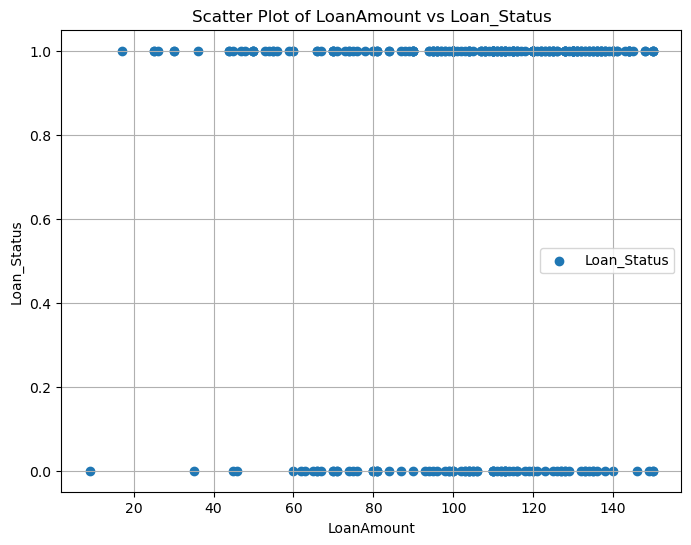

In [51]:
x1= df['LoanAmount']
y1= df['Loan_Status']
plt.figure(figsize=(8, 6))  
plt.scatter(x1, y1, label=feature)  
plt.xlabel("LoanAmount")
plt.ylabel('Loan_Status')
plt.title("Scatter Plot of LoanAmount vs Loan_Status")
plt.legend()  
plt.grid(True)  
plt.show()

In [64]:
### KNN without euclidean distance using sklearn and train_test method

In [65]:
X= df.drop(columns=['Loan_ID','Loan_Status'])
y= df['Loan_Status']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
from sklearn.neighbors import KNeighborsClassifier
k = 5  
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [68]:
new_applicant = np.array([[1, 1, 1, 1, 0, 5800, 0, 150, 360, 1, 2]])
prediction = knn.predict(new_applicant)
print(prediction)

[1]


C:\Users\Tanushree\miniconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [69]:
### KNN using euclidean distance

In [70]:
new_applicant = {
    'Gender': 1, 'Married': 1, 'Dependents': 1, 'Education': 1, 'Self_Employed': 0,
    'ApplicantIncome': 5800, 'CoapplicantIncome': 0, 'LoanAmount': 150,
    'Loan_Amount_Term': 360, 'Credit_History': 1, 'Property_Area': 2
}

# Convert new applicant to DataFrame
new_applicant_df = pd.DataFrame([new_applicant])

# Select relevant features for distance calculation
features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
            'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
            'Loan_Amount_Term', 'Credit_History', 'Property_Area']

In [71]:
# Compute Euclidean distance
df['distance'] = np.sqrt(((df[features] - new_applicant_df.values) ** 2).sum(axis=1))

# Find the k-nearest neighbors (let’s take k=5)
k = 5
nearest_neighbors = df.nsmallest(k, 'distance')

# Predict Loan_Status using majority voting
predicted_loan_status = nearest_neighbors['Loan_Status'].mode()[0]

print(f"Predicted Loan Status: {predicted_loan_status}")

Predicted Loan Status: 1


In [72]:
features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
            'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
            'Loan_Amount_Term', 'Credit_History', 'Property_Area']

LP9999 = np.array([1, 1, 1, 1, 0, 5800, 0, 150, 360, 1, 2])  

df['Distance'] = np.linalg.norm(df[features].values - LP9999, axis=1)

nearest_neighbors = df.nsmallest(3, 'Distance')[['Loan_ID', 'Distance']]
print("3 Nearest Neighbors:")
print(nearest_neighbors)

3 Nearest Neighbors:
      Loan_ID   Distance
285  LP002821  18.138357
25   LP001144  21.863211
215  LP002348  31.464265


In [73]:
features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
            'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
            'Loan_Amount_Term', 'Credit_History', 'Property_Area']

LP9999 = np.array([1, 1, 1, 1, 0, 5800, 0, 150, 360, 1, 2])  

df['Distance'] = np.linalg.norm(df[features].values - LP9999, axis=1)

nearest_neighbors = df.nsmallest(20, 'Distance')[['Loan_ID', 'Distance']]
print("20 Nearest Neighbors:")
print(nearest_neighbors)

20 Nearest Neighbors:
      Loan_ID    Distance
285  LP002821   18.138357
25   LP001144   21.863211
215  LP002348   31.464265
106  LP001715   99.090867
219  LP002368  136.073510
24   LP001138  184.491192
3    LP001008  200.207392
241  LP002494  200.264825
130  LP001849  247.503535
178  LP002142  303.369412
196  LP002250  313.007987
191  LP002225  409.489927
185  LP002181  416.355617
114  LP001750  450.539676
76   LP001528  478.079491
61   LP001385  484.204502
131  LP001854  552.847176
290  LP002863  606.004125
134  LP001872  634.384741
223  LP002379  701.449927


In [74]:
row_index= [285, 25, 215, 106, 219, 24, 3, 241, 130, 178, 196, 191, 185, 114, 76, 61, 131,90,134,223]

y_value = df.iloc[row_index]['Loan_Status']
print(y_value)

285    1
25     1
215    1
106    1
219    1
24     1
3      1
241    1
130    0
178    0
196    1
191    1
185    0
114    1
76     0
61     1
131    0
90     0
134    1
223    0
Name: Loan_Status, dtype: int64


In [75]:
from sklearn.cluster import KMeans
df_encoded = df.drop(columns=["Loan_ID", "Loan_Status"])  

# Choose initial centroids (Loan_IDs "LP001006" and "LP001024")
initial_centroids = df_encoded.loc[df["Loan_ID"].isin(["LP001006", "LP001024"])].values

# Apply K-Means clustering with K = 2
kmeans = KMeans(n_clusters=2, init=initial_centroids, n_init=1, random_state=42)
df["Cluster"] = kmeans.fit_predict(df_encoded)

# Print results
print(df[["Loan_ID", "Cluster"]])  # Shows cluster assignment for each applicant


      Loan_ID  Cluster
0    LP001003        1
1    LP001005        1
2    LP001006        0
3    LP001008        1
4    LP001013        0
..        ...      ...
295  LP002894        1
296  LP002911        0
297  LP002916        0
298  LP002917        1
299  LP002926        1

[300 rows x 2 columns]


In [76]:
import numpy as np
applicant_1 = df[df["Loan_ID"] == "LP001047"].drop(columns=["Loan_ID", "Loan_Status"]).values[0]
cluster_1 = df[df["Loan_ID"] == "LP001006"].drop(columns=["Loan_ID", "Loan_Status"]).values[0]
distance = np.sqrt(np.sum((applicant_1 - cluster_1) ** 2))
print(f"Euclidean Distance between LP001047 and cluster center LP001006: {distance}")

Euclidean Distance between LP001047 and cluster center LP001006: 580.3340809628319


In [77]:
applicant_1 = df[df["Loan_ID"] == "LP001872"].drop(columns=["Loan_ID", "Loan_Status"]).values[0]
cluster_1 = df[df["Loan_ID"] == "LP001006"].drop(columns=["Loan_ID", "Loan_Status"]).values[0]
cluster_2 = df[df["Loan_ID"] == "LP001024"].drop(columns=["Loan_ID", "Loan_Status"]).values[0]

distance_1 = np.sqrt(np.sum((applicant_1 - cluster_1) ** 2))
distance_2 = np.sqrt(np.sum((applicant_1 - cluster_2) ** 2))

if distance_1<distance_2:
    print('c1')
else:
    print('c2')

c2


In [78]:
# Select data points assigned to C1 and C2 (excluding Loan_ID & Cluster labels)
C1_points = df[df['Cluster'] == 1].drop(columns=['Loan_ID', 'Cluster'], errors='ignore').values
C2_points = df[df['Cluster'] == 2].drop(columns=['Loan_ID', 'Cluster'], errors='ignore').values

# Compute the new cluster centers (mean of each feature)
new_C1 = np.mean(C1_points, axis=0)
new_C2 = np.mean(C2_points, axis=0)

print("New Cluster C1 Center:", new_C1)
print("New Cluster C2 Center:", new_C2)


New Cluster C1 Center: [7.53846154e-01 5.38461538e-01 7.17948718e-01 7.64102564e-01
 1.07692308e-01 4.16521026e+03 4.38339077e+02 1.02769231e+02
 3.42584615e+02 8.61538462e-01 1.03589744e+00 6.82051282e-01
 2.09310947e+03 2.09310947e+03]
New Cluster C2 Center: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan]


C:\Users\Tanushree\miniconda3\envs\myenv\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Tanushree\miniconda3\envs\myenv\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [79]:
import numpy as np

C1 = np.array([8.8570000e-01, 7.2380000e-01, 5.9050000e-01, 7.0480000e-01, 5.7100000e-02,
               2.5729905e+03, 2.9012362e+03, 1.0946670e+02, 3.4057140e+02, 8.3810000e-01,
               1.0667000e+00, 7.5240000e-01, 4.6759557e+03, 4.6759557e+03])

C2 = np.array([7.4870000e-01, 5.3330000e-01, 7.2310000e-01, 7.5900000e-01, 1.0770000e-01,
               4.1392359e+03, 4.1262630e+02, 1.0226670e+02, 3.4350770e+02, 8.6150000e-01,
               1.0513000e+00, 6.8210000e-01, 2.0994826e+03, 2.0994826e+03])

# Format values to 2 decimal places
formatted_C1 = np.array2string(C1, formatter={'float_kind': lambda x: "%.2f" % x})
formatted_C2 = np.array2string(C2, formatter={'float_kind': lambda x: "%.2f" % x})

print("New Cluster C1 Center:", formatted_C1)
print("New Cluster C2 Center:", formatted_C2)


New Cluster C1 Center: [0.89 0.72 0.59 0.70 0.06 2572.99 2901.24 109.47 340.57 0.84 1.07 0.75
 4675.96 4675.96]
New Cluster C2 Center: [0.75 0.53 0.72 0.76 0.11 4139.24 412.63 102.27 343.51 0.86 1.05 0.68
 2099.48 2099.48]


In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score

y_pred = knn.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
balance = balanced_accuracy_score(y_test, y_pred)

# Print results
print("Balanced Accuracy:", balance * 100)
print("Accuracy:", accuracy * 100)
print("Precision:", precision * 100)
print("Recall:", recall * 100)
print("F1 Score:", f1 * 100)

Balanced Accuracy: 71.25
Accuracy: 78.33333333333333
Precision: 78.12329514457174
Recall: 78.33333333333333
F1 Score: 76.90700104493207


In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score

# Assuming the actual Loan Status for the new applicant is known
  # Replace with actual value if available

# Convert single predicted value into an array to match metrics function input
y_pred = [predicted_loan_status]
y_true = [actual_loan_status]

# Compute Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
balance = balanced_accuracy_score(y_true, y_pred)

# Print Results
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")
print(f"Balanced Accuracy: {balance * 100:.2f}%")



ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

In [84]:
print(df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'distance', 'Distance', 'Cluster'],
      dtype='object')
